In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv("heart.csv",sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

In [26]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [27]:
df.thal[df["thal"]==0]=2
df.thal.value_counts()

<ipython-input-27-3e1c0ff219aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.thal[df["thal"]==0]=2


2    168
3    117
1     18
Name: thal, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='trestbps'>

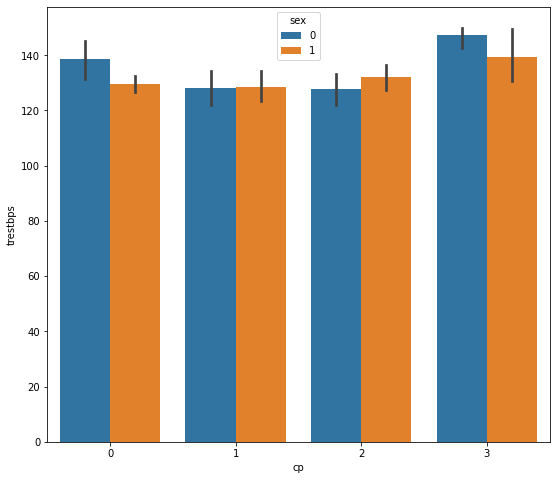

In [28]:
plt.figure(figsize=[9,8])
sns.barplot(x='cp',y='trestbps',hue='sex',data=df, estimator=np.mean)

<AxesSubplot:xlabel='cp', ylabel='chol'>

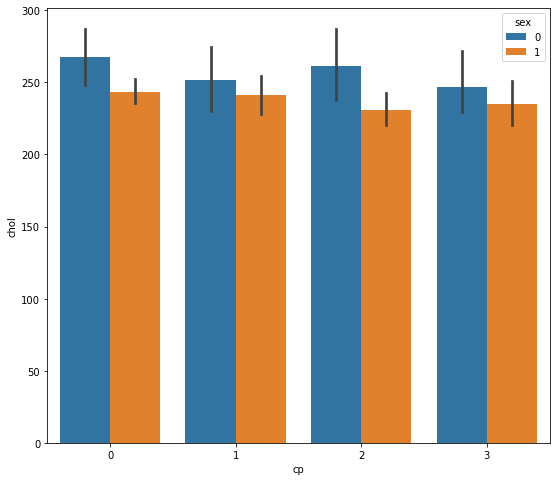

In [29]:
plt.figure(figsize=[9,8])
sns.barplot(x='cp',y='chol',hue='sex',data=df, estimator=np.mean)

<AxesSubplot:xlabel='target', ylabel='age'>

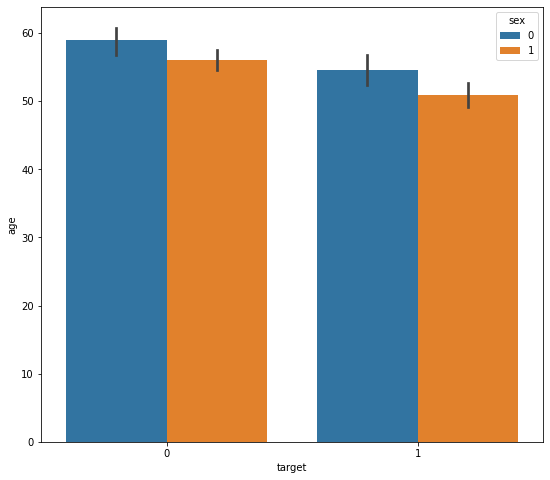

In [30]:
plt.figure(figsize=[9,8])
sns.barplot(x='target',y='age',hue='sex',data=df, estimator=np.mean)

<AxesSubplot:xlabel='thal', ylabel='trestbps'>

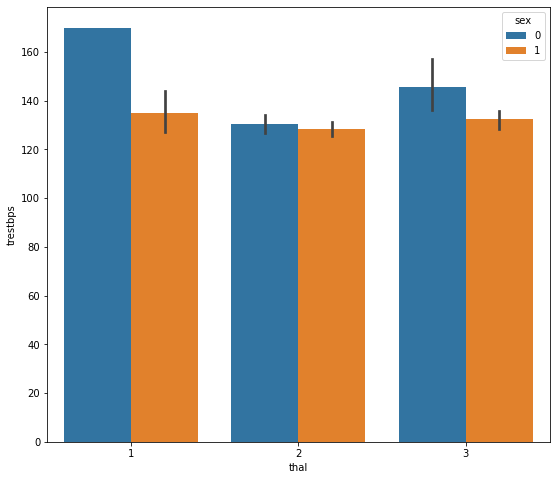

In [31]:
plt.figure(figsize=[9,8])
sns.barplot(x='thal',y='trestbps',hue='sex',data=df, estimator=np.mean)

<AxesSubplot:>

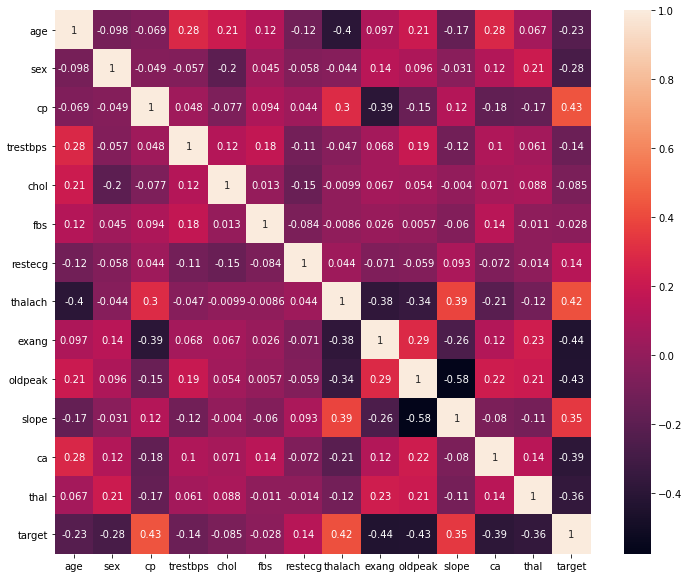

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#features extraction
x=df.drop(columns=['target'])
y=df.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2) #splitting data with test size of 20%
accuracies=[0]
for n_estimators in range(1,100):
    model=RandomForestClassifier(n_estimators)  #Creating a random forest with 100 decision trees
    model.fit(x_train, y_train)  #Training our model
    y_pred=model.predict(x_test)  #testing our model
    if metrics.accuracy_score(y_test, y_pred)> max(accuracies):
        best=n_estimators
    #Measuring the accuracy of our model
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
print("Number of estimators:",best)
print("Accuracy:", max(accuracies))

Number of estimators: 29
Accuracy: 0.8852459016393442


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

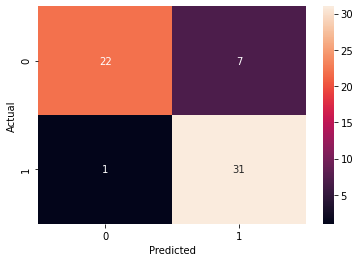

In [34]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [35]:
model=RandomForestClassifier(best)  #Creating a random forest with 100 decision trees
model.fit(x_train, y_train)  #Training our model

RandomForestClassifier(n_estimators=29)

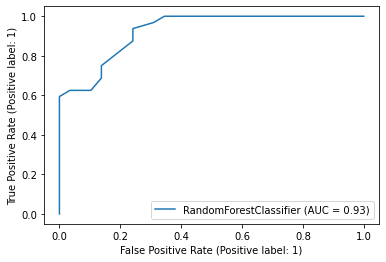

In [36]:
metrics.plot_roc_curve(model, x_test, y_test)  
plt.show()